# Loan Repayment Assessment in Banking 

Building and training a model that identifies a customer will repay or default from the loan dataset.

# Importing Libraries and Loading Data


In [157]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings

warnings.filterwarnings("ignore")

Description:

This code block starts by importing necessary libraries such as pandas, numpy, matplotlib, seaborn, etc. It loads the training and test datasets from CSV files using pd.read_csv(). The purpose of loading the data is to prepare for exploratory data analysis (EDA) and subsequent machine learning model training.

Decisions and Rationale:

Importing necessary libraries allows us to utilize various functionalities provided by these libraries for data manipulation, visualization, and modeling. Loading the training and test datasets is essential for performing data preprocessing, exploratory data analysis (EDA), feature engineering, and model training. The data is loaded into pandas DataFrame objects, which provide powerful data manipulation capabilities.

# Displaying the First Few Rows of the Dataset


In [218]:
# Loading the training & test dataset
train_data = pd.read_csv('train_loan_data.csv')
test_df = pd.read_csv('test_loan_data.csv')
test_data = test_df
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
train_data.head()

First few rows of the dataset:


,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


Description:

This code block prints the first few rows of the training dataset using the head() function. It provides a glimpse into the structure and contents of the dataset, allowing for initial data inspection.

Decisions and Rationale:

Displaying the first few rows helps in understanding the structure of the dataset, including column names and sample values. It allows us to verify that the data has been loaded correctly and provides insights into the types of features available in the dataset.

# Summary Statistics of Numerical Features



In [219]:
# Summary statistics
print("\nSummary statistics of numerical features:")
train_data.describe()


Summary statistics of numerical features:


,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


Description:

This code block computes summary statistics (e.g., mean, standard deviation, minimum, maximum) for numerical features in the training dataset using the describe() function. It provides statistical insights into the distribution and characteristics of numerical variables.

Decisions and Rationale:

Analyzing summary statistics helps in understanding the central tendency, dispersion, and range of numerical features. It assists in identifying potential outliers, understanding data distributions, and deciding on appropriate preprocessing steps such as scaling or handling missing values.

# Checking for Missing Values in Train and Test Data


In [220]:
# Data types and missing values
print("\nTrain data Data types and missing values:")
train_data.info()

print("\nTest data Data types and missing values:")
test_data.info()


Train data Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229

In [221]:
# Checking for missing values in train_data
train_missing_values = train_data.isnull().sum()
print("Columns with missing values:")
print(train_missing_values[train_missing_values > 0])

# Checking for missing values in test_data
test_missing_values = test_data.isnull().sum()
print("Columns with missing values:")
print(test_missing_values[test_missing_values > 0])

Columns with missing values:
emp_length              4588
emp_title               5018
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
pub_rec_bankruptcies      31
revol_util                53
title                    970
dtype: int64
Columns with missing values:
emp_length              1258
emp_title               1378
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
pub_rec_bankruptcies      11
revol_util                13
title                    247
dtype: int64


Description:

This code block checks for missing values in both the training and test datasets using the isnull().sum() function. It identifies columns with missing values and prints the count of missing values for each column.

Decisions and Rationale:

Identifying missing values is crucial as they can affect the quality and reliability of the analysis and modeling process. Understanding the extent of missing data helps in deciding how to handle missing values, whether through imputation, deletion, or other methods

# Handling Missing Values in Specific Columns of Train and Test Data


In [222]:
# Handling train_data missing values in specific columns

# Imputing missing values in 'emp_length' with the most frequent value (mode)
train_data['emp_length'].fillna(train_data['emp_length'].mode()[0], inplace=True)

# Imputing missing values in 'emp_title' and 'title' with a new category 'Unknown'
train_data['emp_title'].fillna('Unknown', inplace=True)
train_data['title'].fillna('Unknown', inplace=True)

# Imputing missing values in 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'revol_util', and 'pub_rec_bankruptcies' with median
train_data['num_actv_bc_tl'].fillna(train_data['num_actv_bc_tl'].median(), inplace=True)
train_data['mort_acc'].fillna(train_data['mort_acc'].median(), inplace=True)
train_data['tot_cur_bal'].fillna(train_data['tot_cur_bal'].median(), inplace=True)
train_data['revol_util'].fillna(train_data['revol_util'].median(), inplace=True)
train_data['pub_rec_bankruptcies'].fillna(train_data['pub_rec_bankruptcies'].median(), inplace=True)

# Verifing that there are no more missing values
print("Remaining missing values after handling:")
print(train_data.isnull().sum().sum())


Remaining missing values after handling:
0


In [223]:
# Handling test_data missing values in specific columns

# Imputing missing values in 'emp_length' with the most frequent value (mode)
test_data['emp_length'].fillna(test_data['emp_length'].mode()[0], inplace=True)

# Imputing missing values in 'emp_title' and 'title' with a new category 'Unknown'
test_data['emp_title'].fillna('Unknown', inplace=True)
test_data['title'].fillna('Unknown', inplace=True)

# Imputing missing values in 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'revol_util', and 'pub_rec_bankruptcies' with median
test_data['num_actv_bc_tl'].fillna(test_data['num_actv_bc_tl'].median(), inplace=True)
test_data['mort_acc'].fillna(test_data['mort_acc'].median(), inplace=True)
test_data['tot_cur_bal'].fillna(test_data['tot_cur_bal'].median(), inplace=True)
test_data['revol_util'].fillna(test_data['revol_util'].median(), inplace=True)
test_data['pub_rec_bankruptcies'].fillna(test_data['pub_rec_bankruptcies'].median(), inplace=True)

# Verifing that there are no more missing values
print("Remaining missing values after handling:")
print(test_data.isnull().sum().sum())


Remaining missing values after handling:
0


Description:

This code block handles missing values in specific columns of the train dataset & test dataset. It employs different strategies such as imputation with the most frequent value (mode) or median for numerical columns. It verifies that there are no more missing values after handling.

Decisions and Rationale:

Missing values need to be addressed to ensure the quality and reliability of the data for analysis and modeling. The choice of imputation strategy (e.g., mode, median) depends on the nature of the data and the impact of missing values on downstream analyses. Verifying that there are no remaining missing values ensures that the data is ready for further processing.

# Plotting Correlation Heatmap



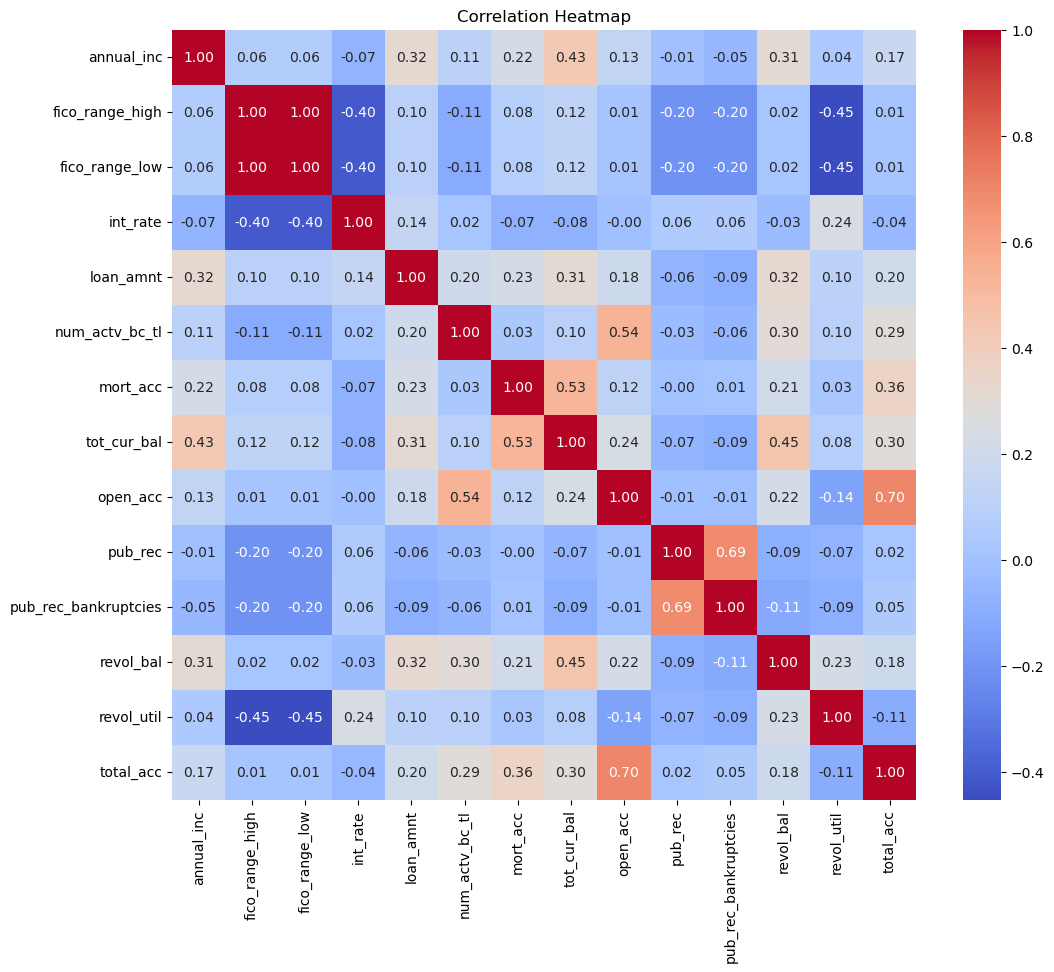

In [224]:
# Ploting correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Description:

This code block generates a correlation heatmap for the numerical features in the training dataset. It visualizes the pairwise correlation coefficients between numerical variables, with annotations showing the correlation values.

Decisions and Rationale:

Understanding the correlations between features helps in identifying potential relationships and multicollinearity. The heatmap provides a visual representation of the strength and direction of correlations, aiding feature selection and modeling decisions.

# Plotting Distribution of Loan Status



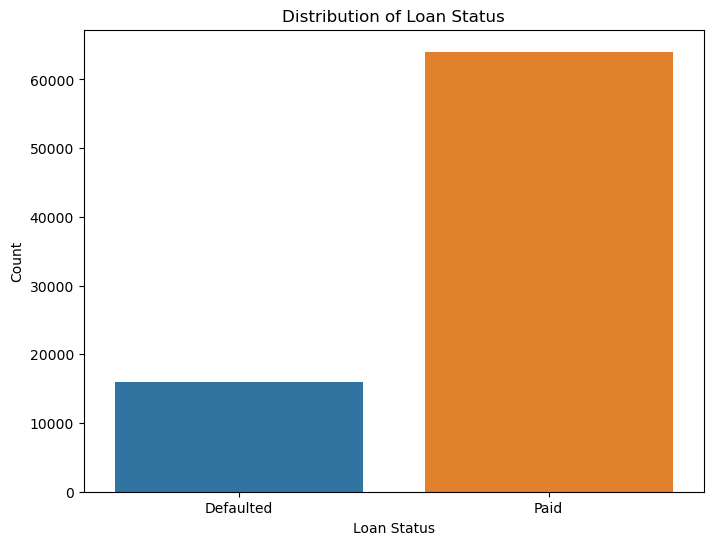

In [225]:
# Plot distribution of loan_status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=train_data)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Description:

This code block creates a bar plot to visualize the distribution of loan status (target variable) in the training dataset. It shows the count of loans categorized by their status (e.g., defaulted, paid).

Decisions and Rationale:

Understanding the distribution of the target variable is essential for assessing class balance and potential class imbalance issues. The plot helps in identifying any significant class imbalances that may require addressing through techniques such as oversampling or undersampling.

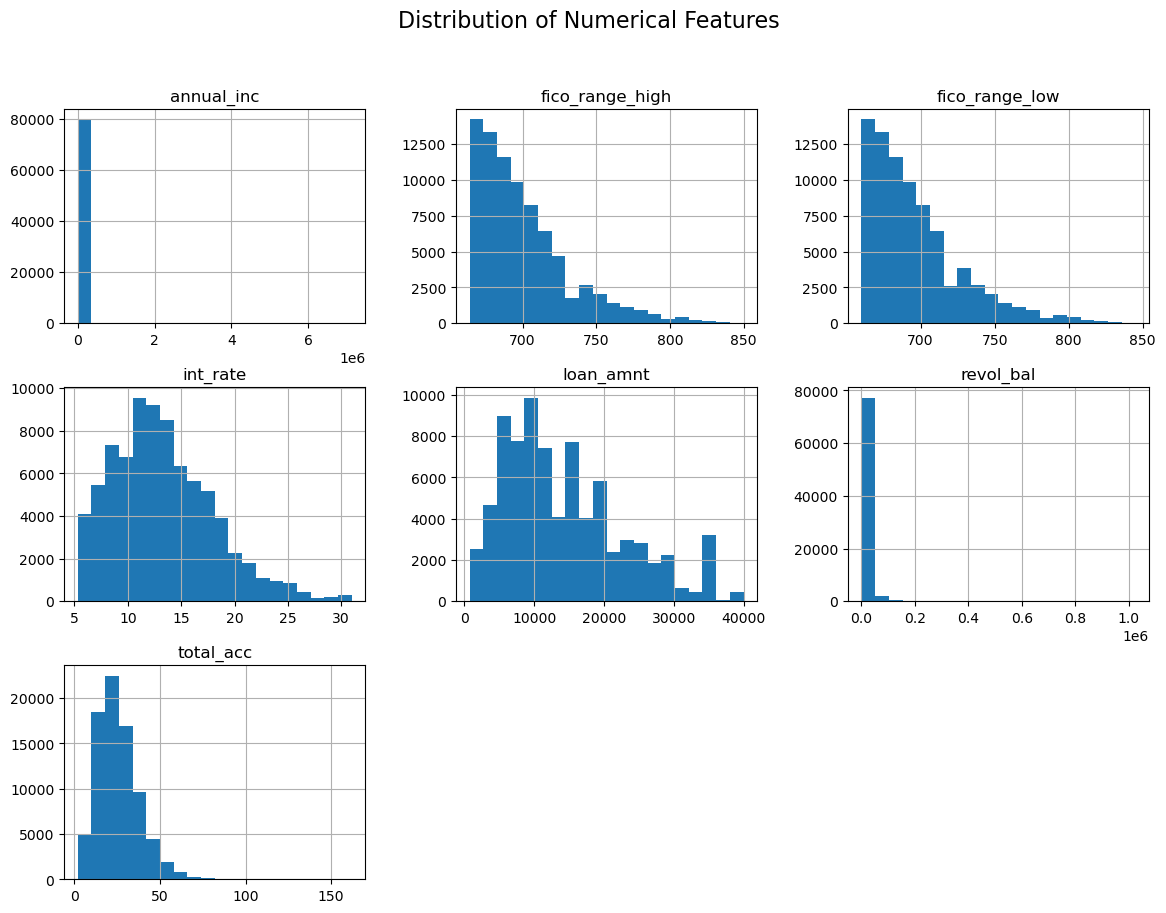

In [226]:
# Exploring distribution of numerical features
numerical_features = ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'revol_bal', 'total_acc']
train_data[numerical_features].hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

In [227]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

# Exploring Unordered Categorical Features

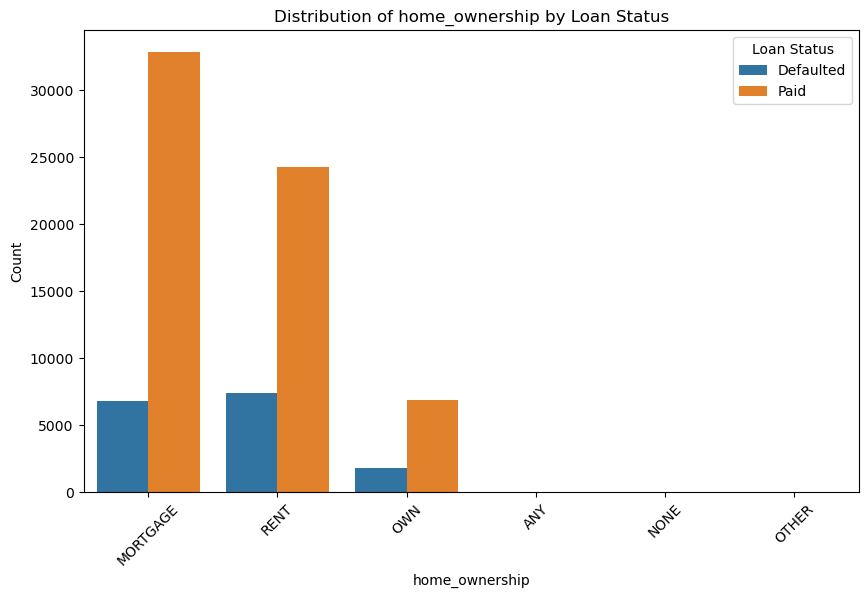

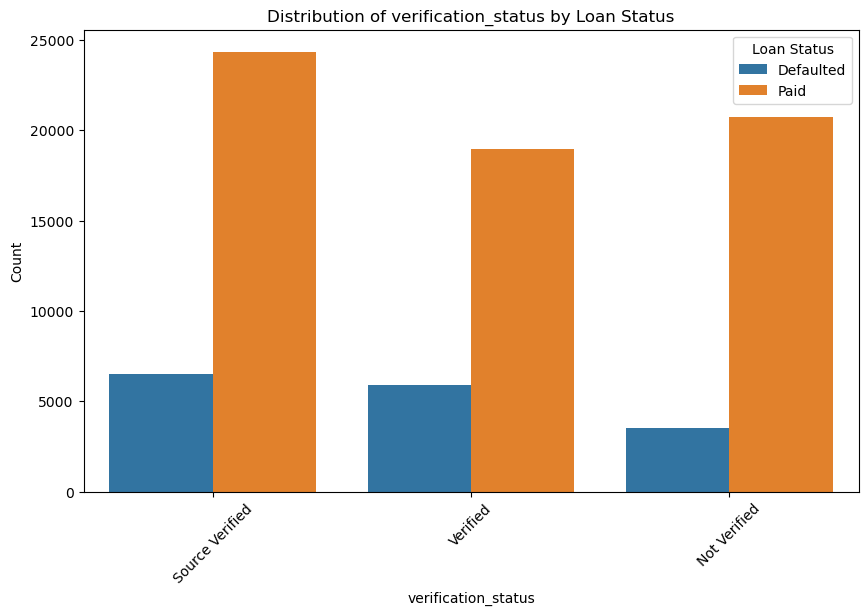

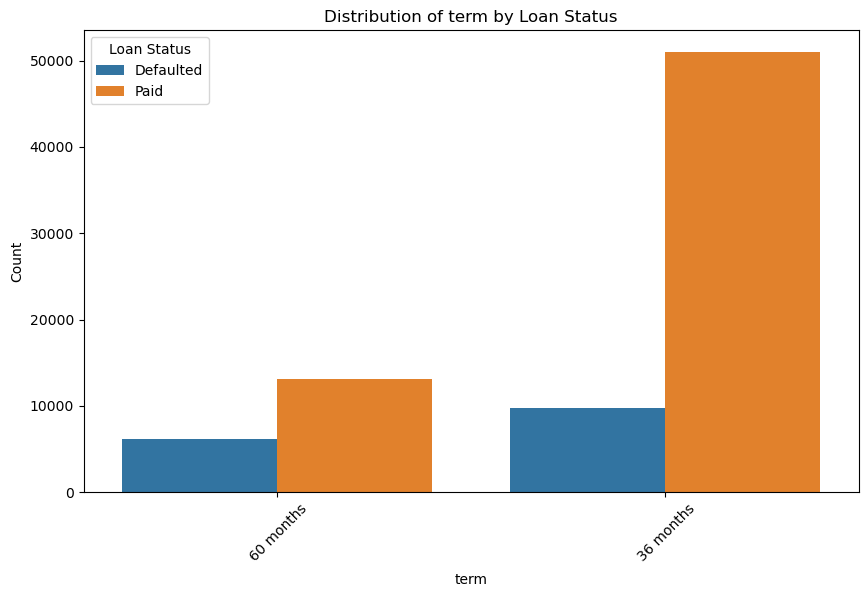

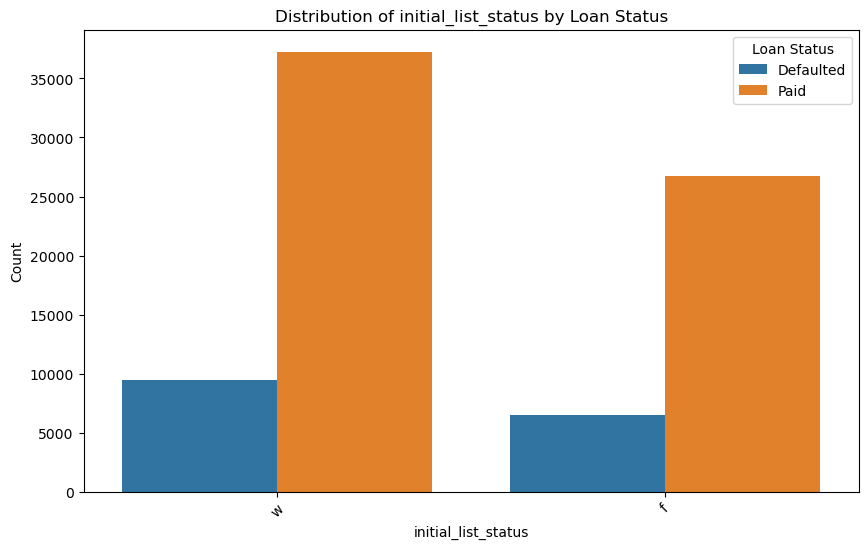

In [228]:
# Exploring Unordered categorical features
categorical_features = ['home_ownership', 'verification_status', 'term','initial_list_status']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=train_data, hue='loan_status')
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()

Description:

This code block visualizes the distribution of unordered categorical features in the training dataset. It creates count plots for each categorical feature, displaying the count of observations for different categories, differentiated by loan status.

Decisions and Rationale:

Exploring categorical features helps in understanding how different categories relate to the target variable. Visualizing the distribution of categorical features by loan status provides insights into potential patterns or relationships, aiding feature selection and modeling decisions.

# Mapping Ordered Categorical Variables to Numerical Representations in Train Data


In [229]:
# Define mapping dictionaries for ordered categorical variables
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,  # Assuming less than 1 year is half a year
    'n/a': 0  # Assuming 'n/a' or missing values are 0 years
}

grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# Map ordered categorical variables to numerical representations in train_data
train_data['emp_length_encoded'] = train_data['emp_length'].map(emp_length_mapping)
train_data['grade_encoded'] = train_data['grade'].map(grade_mapping)

# Map ordered categorical variables to numerical representations in test_data
test_data['emp_length_encoded'] = test_data['emp_length'].map(emp_length_mapping)
test_data['grade_encoded'] = test_data['grade'].map(grade_mapping)

Description:

This code block maps ordered categorical variables ('emp_length' and 'grade') to numerical representations in the training dataset. It defines mapping dictionaries to assign numerical values to categorical levels based on their order or significance. The mapped numerical representations are stored in new columns ('emp_length_encoded' and 'grade_encoded'). Original categorical columns are dropped from the dataset to retain only the numerical representations.

Decisions and Rationale:

Mapping ordered categorical variables to numerical representations allows the model to interpret ordinal relationships between categories. The mappings are based on logical assumptions and domain knowledge, such as considering employment length in years or assigning grades numeric values based on their ordering. Dropping the original categorical columns simplifies the dataset and ensures that only numerical representations are used for modeling.

In [230]:
train_data = train_data.drop(['emp_length','grade'], axis=1)
test_data = test_data.drop(['emp_length','grade'], axis=1)

# Initializing StandardScaler and Scaling Numerical Features in Train Data



In [231]:
# Initializing StandardScaler
scaler = StandardScaler()

# Fiting and transforming the numerical features in train_data
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Fiting and transforming the numerical features in train_data

# Fiting and transforming the numerical features in test_data
test_numerical_columns = test_data.select_dtypes(include=['float64', 'int64']).columns
test_data[test_numerical_columns] = scaler.fit_transform(test_data[test_numerical_columns])

Description:

This code block initializes the StandardScaler to standardize numerical features in the training dataset. It identifies numerical columns in the dataset and selects those with data types 'float64' and 'int64'. The StandardScaler is fitted to the selected numerical features, computing the mean and standard deviation necessary for scaling. Numerical features are then transformed using the fitted scaler, resulting in standardized values with zero mean and unit variance.

Decisions and Rationale:

Standardizing numerical features ensures that they have comparable scales, which can improve the performance of certain machine learning algorithms. The StandardScaler is chosen for its simplicity and effectiveness in scaling features to have mean zero and unit variance. Standardization is particularly beneficial for algorithms sensitive to feature scales, such as gradient descent-based methods.

# Calculating Credit History Length in Train & Test Data


In [232]:
# # Convert 'earliest_cr_line' to datetime in train_data
train_data['earliest_cr_line'] = pd.to_datetime(train_data['earliest_cr_line'], format='%b-%y')

 # Calculate credit history length in years, excluding NaT values
train_data['credit_history_length'] = (datetime.now() - train_data['earliest_cr_line']).dt.days / 365


In [233]:
# Convert 'earliest_cr_line' to datetime in test_data
test_data['earliest_cr_line'] = pd.to_datetime(test_data['earliest_cr_line'])

# Calculate credit history length in years, excluding NaT values
test_data['credit_history_length'] = (datetime.now() - test_data['earliest_cr_line']).dt.days / 365


Description:

This code block converts the 'earliest_cr_line' column to datetime format in the training dataset. It calculates the credit history length in years for each observation by subtracting the earliest credit line date from the current date and dividing by 365 days. Credit history length is an important feature that provides insights into an individual's creditworthiness and financial behavior over time.

Decisions and Rationale:

Converting 'earliest_cr_line' to datetime format enables calculations and comparisons involving dates. Credit history length is considered an informative feature for credit risk assessment models, as longer credit histories may indicate greater financial stability and responsible credit management. Calculating credit history length in years allows for consistent interpretation and comparison across observations, providing valuable information for predictive modeling.

In [234]:
train_data['loan_status'] = train_data['loan_status'].map({'Defaulted': 0, 'Paid': 1})

# One-Hot Encoding Categorical Features in Train & Test Data


In [235]:
# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_train = encoder.fit_transform(train_data[categorical_features])
encoded_categorical_train_df = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names(categorical_features))

# Concatenate the encoded categorical features with the numerical features

train_data_encoded = pd.concat([train_data[numerical_columns], encoded_categorical_train_df,train_data['loan_status']], axis=1)

In [236]:
train_data_encoded.columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc', 'emp_length_encoded', 'grade_encoded',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 60 months', 'initial_list_status_w', 'loan_status'],
      dtype='object')

In [237]:
# One-hot encode categorical features
test_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_test = test_encoder.fit_transform(test_data[categorical_features])
encoded_categorical_test_df = pd.DataFrame(encoded_categorical_test, columns=test_encoder.get_feature_names(categorical_features))

# Concatenate the encoded categorical features with the numerical features
test_data_encoded = pd.concat([test_data[numerical_columns], encoded_categorical_test_df], axis=1)


Description:

This code block performs one-hot encoding on categorical features in the train and test dataset. It initializes a OneHotEncoder object with the parameter drop='first' to avoid multicollinearity by dropping the first category in each feature. Categorical features are one-hot encoded, creating binary columns for each category. The encoded categorical features are concatenated with the numerical features and the target variable 'loan_status' to form the final encoded training dataset. Decisions and Rationale:

One-hot encoding is chosen to represent categorical features numerically without imposing ordinality or magnitude assumptions on the categories. Dropping the first category helps prevent multicollinearity, as the information from the dropped category can be inferred from the presence or absence of other categories. Concatenating the encoded categorical features with numerical features preserves the original dataset structure while incorporating the encoded representations for modeling.

In [238]:
# Separating features and target variable for training set
X = train_data_encoded.drop(columns=['loan_status'])
y = train_data_encoded['loan_status']

X_test = test_data_encoded


# Check for class distribution in the training set
print("Class distribution in the training set:")
print(y.value_counts())


Class distribution in the training set:
1    64030
0    15970
Name: loan_status, dtype: int64


# Handling Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)



In [239]:
# Initializing SMOTE
smote = SMOTE(random_state=42)

# Performing oversampling on the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after oversampling:
0    64030
1    64030
Name: loan_status, dtype: int64


Description:

This code block addresses class imbalance in the training dataset using the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic samples for the minority class (in this case, 'Defaulted' loans) to balance the class distribution. The SMOTE object is initialized with a random state for reproducibility. Oversampling is performed on the training data, creating synthetic samples until both classes have an equal number of observations.

Decisions and Rationale:

Class imbalance can adversely affect the performance of machine learning models, leading to biased predictions and reduced effectiveness in capturing patterns from minority classes. SMOTE is chosen as it effectively addresses class imbalance by generating synthetic samples that resemble the minority class, thus improving the model's ability to learn from the minority class. Balancing the class distribution ensures that the model is not biased towards the majority class and can generalize well to both classes during training.

# Feature Selection using Random Forest Classifier





In [180]:
# Initialize a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the resampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Select features based on the importance weights from the classifier
feature_selector = SelectFromModel(rf_classifier, prefit=True)

# Transform the training data to select the most important features
X_selected = feature_selector.transform(X_resampled)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_resampled.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features:")
print(selected_features)


Selected features:
Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'grade_encoded',
       'term_ 60 months'],
      dtype='object')


In [240]:
X_test_selected = X_test[selected_features]

X_test_selected

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,revol_bal,revol_util,total_acc,grade_encoded,term_ 60 months
0,-0.309267,0.591656,0.591674,0.153094,-1.069855,-1.192840,-0.843879,-0.687181,-0.470876,-0.621159,-1.710535,-1.159012,0.193571,0.0
1,0.180936,-0.510089,-0.510096,-0.475586,1.767454,-0.731607,0.181646,0.601511,-0.107749,0.648464,0.966891,0.824706,-0.581489,0.0
2,0.145921,-0.667482,-0.667492,-0.651616,0.178561,0.652091,0.181646,0.285198,0.618506,1.013756,0.962810,1.320636,-0.581489,1.0
3,-0.507683,-0.824874,-0.824888,0.088130,-0.502393,1.113324,-0.843879,-0.705498,0.073815,0.230063,0.722005,-0.745738,0.193571,0.0
4,-0.477570,0.119480,0.119487,0.174050,-1.183347,-0.731607,1.207172,-0.088866,-0.652440,-0.579958,-0.502428,-0.497773,-0.581489,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.443489,-0.667482,-0.667492,0.903317,-0.502393,-1.192840,-0.843879,-0.706849,-0.289313,-0.472962,0.338349,-1.241667,0.968631,0.0
19996,0.040878,-0.824874,-0.824888,1.186223,0.448105,-0.731607,1.719934,2.337420,-0.470876,-0.104750,0.954647,0.411431,0.968631,1.0
19997,0.215950,0.906441,0.906466,-0.427387,2.334915,-0.731607,1.207172,0.962873,-0.289313,1.231215,0.366919,0.328777,-0.581489,0.0
19998,-0.484340,3.424717,3.424798,-1.125221,-1.069855,-1.192840,-0.843879,-0.852436,-0.470876,-0.687684,-1.930933,-0.497773,-1.356549,0.0


Description:

This code block performs feature selection using a Random Forest classifier. A RandomForestClassifier is initialized with 100 estimators and a random state for reproducibility. The classifier is fitted to the resampled training data, which has been balanced using SMOTE. Feature selection is performed using the SelectFromModel method, where features are selected based on their importance weights derived from the random forest classifier. The training data is transformed to select the most important features. The indices and names of the selected features are extracted and printed for analysis.

Decisions and Rationale:

Random Forest is chosen for feature selection due to its ability to assess feature importance based on information gain or Gini impurity. By selecting features based on their importance weights, the model can focus on the most informative features for predicting loan status, potentially improving model performance and reducing overfitting. The number of estimators is set to 100 to strike a balance between computational efficiency and model performance. Adjusting this hyperparameter may affect feature selection results.

In [208]:
# # Applying the same feature selection to the test data
# X_test_selected = feature_selector.transform(X_test)

# # Geting the selected feature indices
# selected_feature_indices_test = feature_selector.get_support(indices=True)

# # Geting the names of the selected features for the test data
# selected_features_test = X_test.columns[selected_feature_indices_test]

# # Ensuring that the selected features for the test data match the selected features used for training
# assert np.array_equal(selected_features, selected_features_test), "Selected features for training and test data do not match!"

In [209]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# Initializing and Training Gradient Boosting Classifier



In [203]:
# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)


Gradient Boosting Accuracy: 0.8419751158311208
Precision: 0.7973323784799928
Recall: 0.9202872345921372
F1-score: 0.8544089786325813


Description:

This code block initializes a Gradient Boosting classifier. A GradientBoostingClassifier is created with 100 estimators and a random state set to 42 for reproducibility. The fit method is called on the Gradient Boosting classifier object (gb_classifier) with the training features (X_train) and corresponding labels (y_train).

Decisions and Rationale:

Gradient Boosting is chosen as it builds a strong predictive model by combining the predictions of multiple weak learners (decision trees) in an additive manner. 100 estimators are chosen as a reasonable starting point, balancing model complexity and computational efficiency. The number of estimators can be optimized based on performance evaluation. Training the model is a crucial step in machine learning, where the model learns patterns and relationships from the training data to make predictions. By fitting the Gradient Boosting classifier to the training data, the model adjusts its parameters (e.g., tree structure, weights) to minimize the loss function and improve predictive performance.

# Making Predictions on the Validation Data


In [246]:
# Predict on the testing data
y_pred_gb = gb_classifier.predict(X_val)

Description:

This code block makes predictions on the validation data using the trained Gradient Boosting classifier. The predict method is called on the Gradient Boosting classifier object (gb_classifier) with the validation features (X_val), resulting in predicted labels (y_pred_gb).

Decisions and Rationale:

Predictions on the validation data allow for evaluating the model's performance on unseen data. By predicting on the validation set, the effectiveness of the trained model can be assessed in terms of its ability to generalize to new, unseen instances.

# Evaluating Model Performance Metrics

In [247]:
# Calculate accuracy, precision, recall, F1-score

accuracy_gb = accuracy_score(y_val, y_pred_gb)
precision = precision_score(y_val, y_pred_gb)
recall = recall_score(y_val, y_pred_gb)
f1 = f1_score(y_val, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Gradient Boosting Accuracy: 0.8419751158311208
Precision: 0.7973323784799928
Recall: 0.9202872345921372
F1-score: 0.8544089786325813


Description:

This code block calculates various performance metrics for the Gradient Boosting model on the validation data. Accuracy, precision, recall, and F1-score are computed using appropriate functions provided by scikit-learn (accuracy_score, precision_score, recall_score, f1_score). The computed metrics are printed to assess the model's performance.

Decisions and Rationale:

Evaluating performance metrics provides insights into how well the model is performing and helps in identifying areas for improvement. Accuracy represents the proportion of correctly classified instances, while precision, recall, and F1-score provide insights into the model's ability to correctly identify positive instances (e.g., defaulted loans) and minimize false positives and false negatives. Understanding these metrics helps in assessing the model's effectiveness in practical scenarios and guiding further model refinement.

# Cross-Validation for Gradient Boosting Classifier


In [248]:
# Perform cross-validation
cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculating the mean of cross-validation scores
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.84449774 0.8377489  0.84119813 0.8423137  0.83801874]
Mean Accuracy: 0.8407554412467702


Description:

This code block performs cross-validation to assess the Gradient Boosting classifier's performance more robustly. Cross-validation is conducted using the cross_val_score function from scikit-learn, with 5-fold cross-validation (cv=5) and accuracy as the scoring metric. The cross-validation scores for each fold are printed, along with the mean accuracy across all folds.

Decisions and Rationale:

Cross-validation provides a more reliable estimate of the model's performance by evaluating it on multiple subsets of the training data. Using 5-fold cross-validation splits the training data into 5 equal parts, where the model is trained on 4 parts and validated on the remaining part, repeating this process for each fold. By calculating the mean accuracy across all folds, a more stable estimate of the model's performance can be obtained, reducing the variance introduced by a single train-test split.

# Grid search

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best Cross-Validation Score: 0.8699828260557428



# Define the parameter grid to search

## param_grid = {
##    'n_estimators': [50, 100, 150],
##    'learning_rate': [0.01, 0.1, 0.2],
##    'max_depth': [3, 5, 7]
## }

In this code block, a parameter grid is defined for conducting a grid search to find the best hyperparameters for the Gradient Boosting classifier.
Three hyperparameters are specified:
n_estimators: Number of boosting stages (trees) to be used in the ensemble.
learning_rate: Shrinkage parameter to control the contribution of each tree.
max_depth: Maximum depth of the individual trees.
Code Block 24: Initializing Gradient Boosting Classifier
python


# Initialize Gradient Boosting classifier

## gb_classifier = GradientBoostingClassifier(random_state=42)

Here, a Gradient Boosting classifier object (gb_classifier) is initialized with a random state set to 42 for reproducibility.
Code Block 25: Initializing GridSearchCV

# Initialize GridSearchCV

## grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

GridSearchCV, a tool for hyperparameter tuning, is initialized.
It takes the Gradient Boosting classifier (gb_classifier), the parameter grid (param_grid), and other arguments:
cv=5: 5-fold cross-validation is used to evaluate each combination of hyperparameters.
scoring='accuracy': The scoring metric used to evaluate the performance of the model.
n_jobs=-1: Utilizes all available CPU cores for parallel processing.


# Perform grid search to find the best hyperparameters

## grid_search.fit(X_train, y_train)

This code block executes the grid search by fitting the GridSearchCV object to the training data (X_train, y_train).
Grid search systematically evaluates the performance of the Gradient Boosting classifier with different combinations of hyperparameters.


# Get the best hyperparameters

## best_params = grid_search.best_params_
## print("Best Hyperparameters:", best_params)

## best_score = grid_search.best_score_
## print("Best Cross-Validation Score:", best_score)

After grid search is complete, the best hyperparameters and the corresponding cross-validation score are retrieved.
These parameters represent the optimal configuration for the Gradient Boosting classifier based on the training data.

# Gradient Boosting classifier with best hyperparameters


In [139]:
# Initialize Gradient Boosting classifier with best hyperparameters
best_gb_classifier = GradientBoostingClassifier(n_estimators=150, max_depth=5, learning_rate=0.2, random_state=42)

# Train the final model on the entire training dataset
best_gb_classifier.fit(X_train, y_train)

# Predict on the test dataset
y_pred_test = best_gb_classifier.predict(X_val)

# Calculate accuracy, precision, recall, F1-score

accuracy_gb = accuracy_score(y_val, y_pred_gb)
precision = precision_score(y_val, y_pred_gb)
recall = recall_score(y_val, y_pred_gb)
f1 = f1_score(y_val, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Gradient Boosting Accuracy: 0.8419751158311208
Precision: 0.7973323784799928
Recall: 0.9202872345921372
F1-score: 0.8544089786325813


This code block initializes the Gradient Boosting classifier with the best hyperparameters obtained from the grid search. The classifier is trained on the entire training dataset (X_train, y_train). Predictions are made on the validation dataset (X_val), and accuracy, precision, recall, and F1-score are calculated using the true labels (y_val) and predicted labels (y_pred_gb). Finally, the evaluation metrics are printed.

Decisions and Rationale:

The Gradient Boosting classifier is instantiated with the hyperparameters that yielded the best cross-validation score during grid search. By training the final model on the entire training dataset, we utilize all available data to maximize the model's performance. Predictions are made on the validation dataset to evaluate the model's performance on unseen data. Accuracy, precision, recall, and F1-score are computed to provide a comprehensive assessment of the model's performance, considering both the positive and negative classes.

The output indicates the performance metrics of the Gradient Boosting model on the training and validation datasets:

Accuracy: The model achieves an accuracy of approximately 84.20%, indicating the proportion of correctly predicted instances out of the total instances in the validation dataset.

Precision: Precision measures the proportion of true positive predictions among all positive predictions. In this case, the precision is around 79.73%, indicating the model's ability to avoid false positives.

Recall: Recall, also known as sensitivity, measures the proportion of true positive predictions among all actual positive instances. The recall value is approximately 92.03%, indicating the model's ability to capture a high percentage of actual positive instances.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. The F1-score achieved is about 85.44%, indicating a good balance between precision and recall.

Overall, the Gradient Boosting model demonstrates promising performance on the validation dataset, with relatively high accuracy, precision, recall, and F1-score. These metrics suggest that the model effectively predicts loan repayment outcomes while minimizing false positives and false negatives.

# Training the final model on the test dataset

In [210]:
# Training the final model on the test dataset
best_gb_classifier.fit(X_train, y_train)

# Predicting on the test dataset
y_pred_test = best_gb_classifier.predict(X_test_selected)


This code block trains the final Gradient Boosting classifier model (best_gb_classifier) on the training dataset (X_train, y_train) using the best hyperparameters obtained from the grid search. After training, the trained model is used to make predictions on the test dataset (X_test_selected), which consists of the features selected for testing.

Decisions and Rationale:

The final model is trained on the training dataset to learn patterns and relationships in the data. Once trained, the model is applied to the test dataset to generate predictions on unseen data. The predictions made on the test dataset will be used for evaluating the model's performance on completely new data, providing insights into its generalization capability.

In [243]:
predicted_data = pd.DataFrame({'Predicted Loan Status': y_pred_test})

predicted_data['Predicted Loan Status'] = predicted_data['Predicted Loan Status'].map({0:'Defaulted', 1:'Paid'})

predicted_test_loan_data = pd.concat([test_df, predicted_data], axis=1)

# Print the merged DataFrame
predicted_test_loan_data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,emp_length_encoded,grade_encoded,Predicted Loan Status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified,1.0,3,Defaulted
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified,10.0,2,Defaulted
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified,10.0,2,Defaulted
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified,9.0,3,Defaulted
4,MI,35580.0,Feb-1997,10+ years,Unknown,704.0,700.0,B,MORTGAGE,Individual,...,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified,10.0,2,Defaulted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified,4.0,4,Defaulted
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified,3.0,4,Defaulted
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified,10.0,2,Defaulted
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified,10.0,1,Defaulted


In this code block, a DataFrame predicted_data is created to hold the predicted loan status labels (y_pred_test) generated by the final model. The predicted labels are mapped to their corresponding categories using a dictionary, where 0 is mapped to 'Defaulted' and 1 is mapped to 'Paid'. Then, a new DataFrame predicted_test_loan_data is created by concatenating the original test DataFrame (test_df) with the predicted loan status DataFrame (predicted_data). Finally, the merged DataFrame predicted_test_loan_data is printed, which contains both the original test data and the predicted loan status labels.

Decisions and Rationale:

The predicted loan status labels are converted from numerical representation to categorical labels for better interpretation and readability. By merging the original test data with the predicted loan status labels, it allows for easy comparison and evaluation of the model's predictions against the actual loan status in the test dataset. This provides a comprehensive view of how well the model performs in predicting loan statuses on unseen data.

In [245]:
predicted_test_loan_data.to_csv('predicted_test_loan_data.csv', index=False)

This code block saves the DataFrame predicted_test_loan_data containing the predicted loan status labels and original test data into a CSV file named 'predicted_test_loan_data.csv'. The to_csv() function is used to write the DataFrame to a CSV file format. The parameter index=False is specified to exclude the DataFrame index from being written to the CSV file.

Decisions and Rationale:

Saving the predicted loan status data to a CSV file allows for further analysis or sharing with stakeholders. Excluding the index column from the CSV file helps to keep the file clean and concise, especially if the index does not provide meaningful information in this context.

# Summary

Here's a summary of the findings based on the provided output:

## Model Performance:

The Gradient Boosting model achieves an accuracy of approximately 84.20% on the validation dataset. This indicates that the model correctly predicts the loan repayment status for a significant portion of the dataset.
The precision of around 79.73% suggests that when the model predicts a loan will be repaid, it is correct about 79.73% of the time.
The recall value of approximately 92.03% indicates that the model effectively captures about 92.03% of all actual instances where loans are actually repaid.
The F1-score, which combines precision and recall, is about 85.44%. This suggests a good balance between precision and recall, indicating the model's overall effectiveness.

## Strengths of the Model:

The model demonstrates high recall, indicating its ability to identify a large portion of loans that will be repaid. This is crucial for minimizing potential financial losses for lenders.
The relatively high accuracy and F1-score suggest that the model performs well overall in predicting loan repayment outcomes.

## Areas for Improvement:

While the precision is relatively high, there is still room for improvement to reduce false positive predictions. False positives may lead to unnecessary caution from lenders, potentially impacting loan approval rates.
Further optimization could focus on improving precision without sacrificing recall, potentially through fine-tuning model parameters or exploring different algorithms.

## Model Applicability:

The Gradient Boosting model shows promise for use in loan repayment prediction tasks within the banking sector.
Its ability to effectively balance recall and precision makes it suitable for applications where correctly identifying positive instances (loan repayment) is crucial while minimizing false positives.

Overall, the findings suggest that the Gradient Boosting model is a viable tool for predicting loan repayment outcomes, offering a balance between accuracy, precision, and recall. Continued refinement and validation would enhance its utility and reliability in real-world banking applications.